# COGS 108 - USA vs. The World in the NBA

# Overview

For this project, we used a data set from Basketball Reference that covers all the recorded player stats from 1996 to 2019 in order to analyze whether there is a distinction between international player performance and domestic player performance in the NBA. Since our data is widely available to the public, we did not have to worry too much about privacy issues and data cleaning. However, we did remove most of the statisticss covered in the data set and kept the ones we believed to be the most indicative of player performance and success.

# Names

- Andy Ly
- Alex Padayao
- Cameron Brody
- Mehul Kalsi
- Jonathan Rodriguez

<a id='research_question'></a>
# Research Question

On average, do international-born NBA players historically perform better than domestic player?

<a id='background'></a>

## Background & Prior Work


Every NBA season consists of players that originate from North America and others that are born and recruited from international regions. With the emergence of international superstars like Giannis Antetokounmpo and Luka Doncic in the NBA, we wanted to look back at and trace if international players have historically performed better than domestic players? As basketball enthusiasts, we learned about the importance of analytics and researched advanced statistics to determine if international-born players have historically performed better than their counterparts. The performance metrics we used to analyze the two player pools were the offensive, defensive performance, and player’s overall performance (PER) metric. For the offensive metric, we decided to analyze true shooting percentage (TS%) as this metric is the most inclusive and accurate representation of a player’s ability to score. For the defensive performance metric, we combined the 3 most affluent defensive metrics to create an aggregate of defensive performance, including steals (STL), blocks (BLK), and personal fouls (PF). To better understand each player's impact on both ends of the court, we looked at the player's overall performance (PER). This metric provides deeper insights into a player's overall effectiveness by creating an aggregate of various offensive and defensive statistics.



References :
- 1) Impact of Analytics on the NBA.   
    https://onlinedsa.merrimack.edu/nba-analytics-changing-basketball/

- 2) Foreign Born Players in the NBA.           
    https://www.nba.com/history-international-players-nba


# Hypothesis


Our hypothesis is that due to the increased cost and logistical challenges of importing foreign players, the foreing player pool's performance is significantly greater than the domestic player pool. 

Our null hypothesis is that there is no difference between the these 3 metrics. Our alternative hypothesis is that there is a difference in that the International players, on average, perform better than their American counterparts across all metrics. 

To do this we will be performing a 1-sided t-test, with an alpha level = 0.05,  to compare the distributions of the 3 player metrics between the two player groups. In order to do these comparisons, we will need to test each pools player metrics in the dataset for **normality**.


# Dataset(s)

- Dataset Name: NBA Players : Biometric, biographic, and basic box score features from 1996 to 2019 season
- Link to the dataset: https://www.kaggle.com/justinas/nba-players-data
- Number of observations: 2235

This dataset contains data on the country of origin, draft year, and basic statistics such as Points Per Game (PPG), Assists Per Game (APG), and Rebounds Per Game (RPG) for NBA players from 1996 - 2019.

The most important of these is the **country of origin**, as this data set is the criteria by which we will ***seperate international and domestic players*** for our study. 

=======================================================

- Dataset Name: www.basketball-reference.com
- Link to the dataset: https://www.basketball-reference.com/leagues/NBA_2019_advanced.html
- Number of observations: ~500 players per season, 24000 total

From basketball-reference, we are able to get the statistics for every player, from every season in recorded history. 

For our exploration, we’ll be utilizing some standard basketball statistics like points and rebounds, plus advanced statistics from basketball-reference, such as PER, in order to answer our question. 

The link contains one season, so we would have 48 different instances of this type of data to account for our seasons from 1996-2019 (two per season - one standard and one advanced).

=======================================================

With our selected datasets, we plan to first combine our separate basketball-reference data sets to make a comprehensive list of players. This will be done by adding the rows of stats together, then merging the two types of statistics based on the player, team, and year. Finally, we can combine that with our information from Kaggle based on the same statistics in order to have our complete data set. We decided to filter out players with low game counts in order to remove outlier data from our analysis. We also filtered out observations per season that:
- Played less than 10 games
- Averaged less than 10 minutes per Game
- Averaged less than an average of 5 Field Goals per Game




# Setup

In [ ]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# Import Patsy, scipy, statsmodels
import patsy

# Double import statement to avoid statsmodels import bug
import statsmodels.api as sm
import statsmodels as sm

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mpl.__version__
sns.__version__

'0.11.1'

# Data Cleaning

To begin importing and cleaning, we read it from our csv file, then reduce the columns to only the necessary variables. Next, in order to remove statistical outliers due to low time played, we remove players from our data based on games played and minutes played. PER and TS% are both heavily skewed by players with extremely low minutes due to the way they are calculated, so it's important to make sure our data is accurate to real-game situations. To do this, we tried to emulate the same method basketball-reference uses to trim their data for the same purpose.

In [ ]:
nba_players = pd.read_csv('1996-2019_full_stats.csv')
critical_stats = nba_players[['Player', 'Pos', 'PER', 'TS%', 'DWS', 'country', 'STL', 'BLK', 'DRB', 'season', 'PF', 'G', 'MP', 'FGA']]
critical_stats['DS'] = (critical_stats['STL'].values) + (critical_stats['BLK'].values * 1.1) + (critical_stats['PF'].values / 2)
critical_stats = critical_stats[(critical_stats["G"] > 10) & (critical_stats["MP"] > 10) & (critical_stats['FGA'] > 5)]
critical_stats.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Player,Pos,PER,TS%,DWS,country,STL,BLK,DRB,season,PF,G,MP,FGA,DS
0,Mahmoud Abdul-Rauf\abdulma02,PG,13.2,0.524,0.7,USA,0.7,0.1,1.4,1997.0,2.3,75,28.4,12.3,1.96
1,Shareef Abdur-Rahim\abdursh01,PF,17.4,0.518,1.2,USA,1.0,1.0,4.2,1997.0,2.5,80,35.0,15.2,3.35
3,Cory Alexander\alexaco01,PG,14.3,0.528,0.6,USA,1.0,0.2,1.2,1997.0,1.9,80,18.2,6.1,2.17
4,Ray Allen*\allenra02,SG,14.6,0.541,1.5,USA,0.9,0.1,2.8,1997.0,2.7,82,30.9,11.1,2.36
7,Kenny Anderson\anderke01,PG,19.5,0.540,4.4,USA,2.0,0.2,3.3,1997.0,2.7,82,37.6,13.9,3.57


# Data Analysis & Results

First we needed to isolate the specific stats that were of interest to our study. We then sorted the player records by the player's country of origin into two separate dataframes.  For our purposes we separated the player base into players who originate from the USA and the players who aren't. We create the groups for maximum per-season statistics as well.

In [ ]:
usa = critical_stats[critical_stats["country"] == "USA"]
international = critical_stats[critical_stats["country"] != "USA"]
usa_season_max = usa.groupby("season").max()
int_season_max = international.groupby("season").max().reset_index()
usa_season_max['season'] = usa_season_max.index

Then, we grouped each season's PER average by their nationality and plotted a line chart to visualize the comparison between the average PER of the 2 player pools.

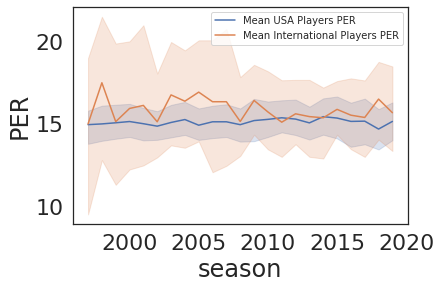

In [ ]:
lineplot = sns.lineplot(data=usa, x="season", y="PER", label = "Mean USA Players PER", ci=100)
sns.lineplot(data=international, x="season", y="PER", label = "Mean International Players PER", ci=100)
lineplot.legend(fontsize = 10)

The chart above shows the mean PER for both groups, with the dark area around the lines being the 100% confidence interval for this statistic. We can see that for most years, international players' mean PER has been higher, with some years having a significant difference. However, the international players' PER also has a much wider confidence interval, meaning the range of values is much larger. This means that there is much more variance in the PER values for international players, while the domestic players are more consistent but lower.

To better understand the data, we also charted the highest PER score per season by player nationality. 

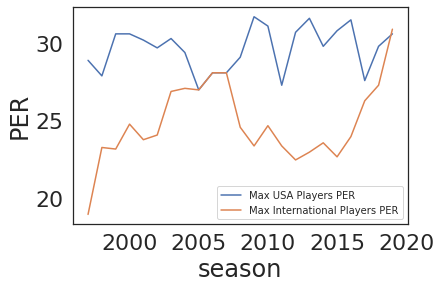

In [ ]:
lineplot = sns.lineplot(data=usa_season_max, x="season", y="PER", label = "Max USA Players PER", ci=100)
sns.lineplot(data=int_season_max, x="season", y="PER", label = "Max International Players PER", ci=100)
lineplot.legend(fontsize = 10)

This chart is very interesting, as its results differ from the previous chart showing average PER for each group. Here, we can see that for almost every year, a domestic player has had the highest PER in the NBA. That said, there is a section between 2005 and 2010 in which both groups had nearly identical PER record holders for several years. These years featured one of the great international stars Dirk Nowitzki. After that, the domestic group returned to dominance until very recently. In the last year of our data set, the maximum international PER shot above the maximum domestic PER. This is due to the rise of a new international star, Giannis Antetokounmpo.

Then, in order to compare the distributions of the PER scores for the domestic and international players, we needed to demonstrate the normality of the distributions. Given that statistical reporting for sports statistics are typically prone to outliers (mainly due to the formulas used to create aggregate scores like PER), we wanted to make sure that the outliers for both populations did not effect the normality of the distributions.

Mean PER for International players: 15.8312091503268
Mean PER for USA players: 15.112724167378309


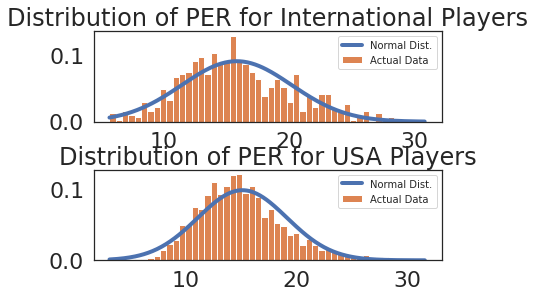

In [ ]:
fig, axs = plt.subplots(2)
fig.tight_layout()
international_PER = international['PER'].values
xs = np.arange(international_PER.min(), international_PER.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(international_PER), np.std(international_PER))
# most easily done using matplotlib
axs[0].plot(xs, fit, label = 'Normal Dist.', lw = 4)
axs[0].hist(international_PER, density = True, label = 'Actual Data', bins=50)
axs[0].set_title('Distribution of PER for International Players')
axs[0].legend(prop={'size': 10});
print("Mean PER for International players: " + str(international_PER.mean()))


usa_PER = usa['PER'].values
xs = np.arange(usa_PER.min(), usa_PER.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(usa_PER), np.std(usa_PER))
# most easily done using matplotlib
axs[1].plot(xs, fit, label = 'Normal Dist.', lw = 4)
axs[1].hist(usa_PER, density = True, label = 'Actual Data', bins=50)
axs[1].set_title('Distribution of PER for USA Players')
axs[1].legend(prop={'size': 10});
print("Mean PER for USA players: " + str(usa_PER.mean()))

After demonstrating normality, we then performed a one tailed t-test using the statsmodels api to test our hypothesis. We chose to proceed with an alpha level of 0.05

In [ ]:
#one tailed t-test for PER
print('=========American PER Statistics=========')
print(usa["PER"].describe())
print('=========International PER Statistics=========')
print(international["PER"].describe())
print('=====================================')
#std different, set usevar = 'unequal'
#x1 = usa, x2 = domestic
#H0: x1 - x2 = 0, HA: x1 - x2 < 0; alternative = 'smaller'
PER_test_result = sm.stats.weightstats.CompareMeans.from_data(usa["PER"], international["PER"]).ttest_ind(alternative='smaller', usevar='unequal', value=0)
#returns t-stat, p-val, degrees of freedom
print("One-Tailed t-test results for PER")
print("t-statistic: " + str(round(PER_test_result[0],3)))
print("p-value: " + str(round(PER_test_result[1],5)))
print("degrees of freedom: " + str(round(PER_test_result[2], 3)))
#given p-value of 0.01, and alpha = 0.05, we can reject the null hypothesis

=========American PER Statistics=========
count    3513.000000
mean       15.112724
std         4.031682
min         3.100000
25%        12.400000
50%        14.700000
75%        17.300000
max        31.700000
Name: PER, dtype: float64
=========International PER Statistics=========
count    612.000000
mean      15.831209
std        4.376008
min        5.700000
25%       12.700000
50%       15.400000
75%       18.800000
max       30.900000
Name: PER, dtype: float64
One-Tailed t-test results for PER
t-statistic: -3.791
p-value: 8e-05
degrees of freedom: 802.01


The one sided t-test results with a **p-value of 8e-05**. Given an alpha = 0.05, we can reject the null hypothesis in favor of the alternative hypothesis; **International players average PER is significantly greater than the American players average PER.**

We then proceeded to do the same visualization and analysis with the true-shooting percentage (TS%) statistic to better understand the offensive performances of the domestic and foriegn players. 

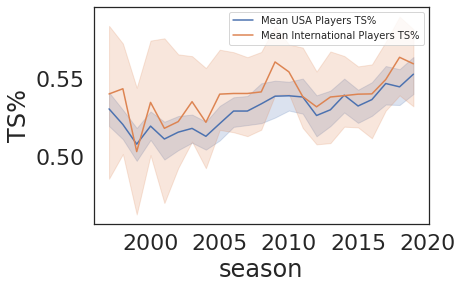

In [ ]:
lineplot = sns.lineplot(data=usa, x="season", y="TS%", label = "Mean USA Players TS%", ci=100)
sns.lineplot(data=international, x="season", y="TS%", label = "Mean International Players TS%", ci=100)
lineplot.legend(fontsize = 10)

This chart, much like the first one in the previous section, shows the mean TS% for both groups through each season in our data set. And again, the results are very similar to the previous statistic. Overall, international players have a higher average TS% for almost every season, but again their variance is significantly higher than that of the domestic group. The only times in which the domestic group was able to have a higher average TS% than the international group was around 2004 and 2014. However, it seems possible for the domestic group to overtake them again in the near future seeing how the chart is currently trending. TS% is an interesting statistic, as it can be favorable both for large players who take close-up shots as well as long-range 3-point shooters. However, looking at the maximum per season, we can see some evidence of favoring one group over another.

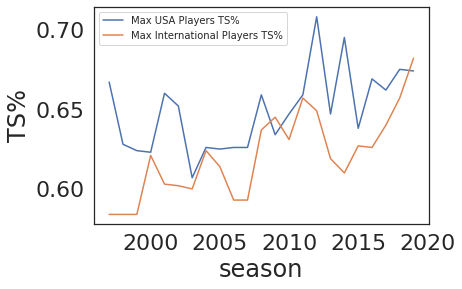

In [ ]:
lineplot = sns.lineplot(data=usa_season_max, x="season", y="TS%", label = "Max USA Players TS%", ci=100)
sns.lineplot(data=int_season_max, x="season", y="TS%", label = "Max International Players TS%", ci=100)
lineplot.legend(fontsize = 10)

When looking at the maximum TS% per season, it's important to understand these values relative to the average TS%. For example, the maximum domistic TS% in 2013 was around 0.725, which is almost 50% higher than the average TS% for domestic players that year. The players getting these extremely high TS% are players taking "easy shots" close to the rim, and therefore are almost all centers. This includes big international names like Rudy Gobert, but the highest values on this chart are not by big names. That 0.725 TS% in 2013 is by Chris Wilcox, a player who has never won an NBA accolade. Overall, we can see a similar trend to what happened in our PER analysis. The maximum TS% per year is almost always a domestic player, except for a few specific examples. This includes the most recent season, in which Rudy Gobert held the title for TS%.

We can continue our analysis by performing the same statistical tests from before on our TS% metric to find if the difference between the groups is significant.

Mean TS% for International players: 0.542563725490196
Mean TS% for USA players: 0.5290734415029889


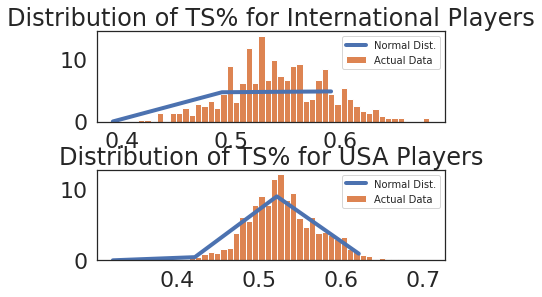

In [ ]:
fig, axs = plt.subplots(2)
fig.tight_layout()
international_TS = international['TS%'].values
xs = np.arange(international_TS.min(), international_TS.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(international_TS), np.std(international_TS))
# most easily done using matplotlib
axs[0].plot(xs, fit, label = 'Normal Dist.', lw = 4)
axs[0].hist(international_TS, density = True, label = 'Actual Data', bins=50);
axs[0].set_title('Distribution of TS% for International Players')
axs[0].legend(prop={'size': 10});
print("Mean TS% for International players: " + str(international_TS.mean()))

usa_TS = usa['TS%'].values
xs = np.arange(usa_TS.min(), usa_TS.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(usa_TS), np.std(usa_TS))
# most easily done using matplotlib
axs[1].plot(xs, fit, label = 'Normal Dist.', lw = 4)
axs[1].hist(usa_TS, density = True, label = 'Actual Data', bins=50);
axs[1].set_title('Distribution of TS% for USA Players')
axs[1].legend(prop={'size': 10});
print("Mean TS% for USA players: " + str(usa_TS.mean()))

In [ ]:
#one tailed t-test for TS%
print('=========American TS% Statistics=========')
print(usa["TS%"].describe())
print('=========International TS% Statistics=========')
print(international["TS%"].describe())
print('=====================================')
#std different, set usevar = 'unequal'
#x1 = usa, x2 = domestic
#H0: x1 - x2 = 0, HA: x1 - x2 < 0; alternative = 'smaller'
TSP_test_result = sm.stats.weightstats.CompareMeans.from_data(usa["TS%"], international["TS%"]).ttest_ind(alternative='smaller', usevar='unequal', value=0)
#returns t-stat, p-val, degrees of freedom
print("One-Tailed t-test results for TS%")
print("t-statistic: " + str(round(TSP_test_result[0],3)))
print("p-value: " + str(TSP_test_result[1]))
print("degrees of freedom: " + str(round(TSP_test_result[2], 3)))
#given p-value of 0.01, and alpha = 0.05, we can reject the null hypothesis

=========American TS% Statistics=========
count    3513.000000
mean        0.529073
std         0.043535
min         0.322000
25%         0.501000
50%         0.526000
75%         0.556000
max         0.708000
Name: TS%, dtype: float64
=========International TS% Statistics=========
count    612.000000
mean       0.542564
std        0.045548
min        0.392000
25%        0.514000
50%        0.540000
75%        0.575000
max        0.682000
Name: TS%, dtype: float64
One-Tailed t-test results for TS%
t-statistic: -6.805
p-value: 9.743531086212742e-12
degrees of freedom: 817.36


The one sided t-test results with a **p-value of 1.386e-10**. Given an alpha = 0.05, we can reject the null hypothesis in favor of the alternative hypothesis; **International players average true shooting percentage(TS%) is significantly greater than the American players true shooting percentage(TS%).**

The final statistic we're looking at is one we created, simply titled Defensive Statistic (DS). This statistic uses a formula with steals, blocks, and personal fouls to find how effective a player is at playing defense. All of these three statistics are critical during defensive play, so we wanted to include all of them. However, they are weighted differently: blocks are weighted slightly higher than steals, and fouls are weighted at 50% since not all fouls are necessarily good defensive plays.

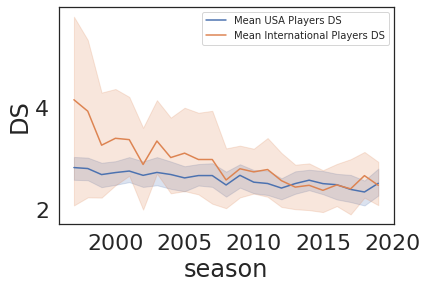

In [ ]:
lineplot = sns.lineplot(data=usa, x="season", y="DS", label = "Mean USA Players DS", ci=100)
sns.lineplot(data=international, x="season", y="DS", label = "Mean International Players DS", ci=100)
lineplot.legend(fontsize = 10)

This plot showing average DS per season is very interesting, as we can see before 2000, mean international DS was exceptionally high with extremely high variance. After that, however, the DS means became closer and closer. That said, international players still have the edge for most years. This chart also continues the trend of international players having very high variance with their statistics relative to domestic players.

,Player,Pos,PER,TS%,DWS,country,STL,BLK,DRB,season,PF,G,MP,FGA,DS
2999,Marcus Camby\cambyma01,C,19.9,0.499,4.5,USA,1.4,3.3,9.6,2006.0,2.8,56,33.2,11.6,6.43


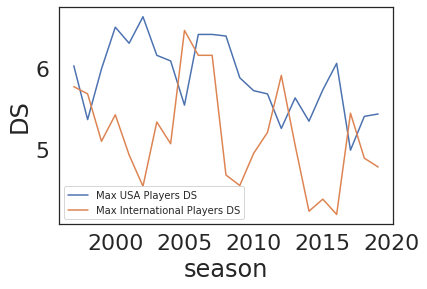

In [ ]:
lineplot = sns.lineplot(data=usa_season_max, x="season", y="DS", label = "Max USA Players DS", ci=100)
sns.lineplot(data=int_season_max, x="season", y="DS", label = "Max International Players DS", ci=100)
lineplot.legend(fontsize = 10)

Once again, domestic players show their dominance in the maximum for this category, with certain periods being dominated by specific players. For example, 2000-2005 was ruled by the Pistons' Ben Wallace and 2006-2009 by the Nuggets' Marcus Camby. This shows defensive longevity for these players, whereas international players are only ever able to hold the title for a single season at a time.

Once again, we will use statistical methods to analyze the differences between these two groups.

Mean DS for International players: 2.738692810457516
Mean DS for USA players: 2.6094563051522917


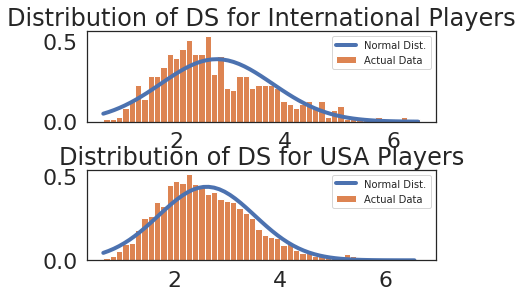

In [ ]:
fig, axs = plt.subplots(2)
fig.tight_layout()

international_DS = (international['STL'].values) + (international['BLK'].values * 1.1) + (international['PF'].values / 2)
xs = np.arange(international_DS.min(), international_DS.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(international_DS), np.std(international_DS))
# most easily done using matplotlib
axs[0].plot(xs, fit, label = 'Normal Dist.', lw = 4)
axs[0].hist(international_DS, density = True, label = 'Actual Data', bins=50);
axs[0].set_title('Distribution of DS for International Players')
axs[0].legend(prop={'size': 10});
print("Mean DS for International players: " + str(international_DS.mean()))

usa_DS = (usa['STL'].values) + (usa['BLK'].values * 1.1) + (usa['PF'].values / 2)
xs = np.arange(usa_DS.min(), usa_DS.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(usa_DS), np.std(usa_DS))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(usa_DS, density = True, label = 'Actual Data', bins=50);
plt.title('Distribution of DS for USA Players')
plt.legend(prop={'size': 10});
print("Mean DS for USA players: " + str(usa_DS.mean()))

In [ ]:
#setting DS into dataframe for stats report
usa_DS_df = pd.DataFrame(usa_DS, columns = ["DS"])
international_DS_df = pd.DataFrame(international_DS, columns = ["DS"])

In [ ]:
#one tailed t-test for DS
print('=========American DS Statistics=========')
print(usa_DS_df.describe())
print('=========International DS Statistics=========')
print(international_DS_df.describe())
print('=====================================')
#std different, set usevar = 'unequal'
#x1 = usa, x2 = domestic
#H0: x1 - x2 = 0, HA: x1 - x2 < 0; alternative = 'smaller'
DS_test_result = sm.stats.weightstats.CompareMeans.from_data(usa_DS_df, international_DS_df).ttest_ind(alternative='smaller', usevar='unequal', value=0)
#returns t-stat, p-val, degrees of freedom
print("One-Tailed t-test results for DS")
print("t-statistic: " + str(DS_test_result[0][0]))
print("p-value: " + str(DS_test_result[1][0]))
print("degrees of freedom: " + str(DS_test_result[2][0]))
#given p-value of 0.01, and alpha = 0.05, we can reject the null hypothesis

=========American DS Statistics=========
                DS
count  3513.000000
mean      2.609456
std       0.915139
min       0.650000
25%       1.960000
50%       2.490000
75%       3.140000
max       6.650000
=========International DS Statistics=========
               DS
count  612.000000
mean     2.738693
std      1.030984
min      0.650000
25%      1.990000
50%      2.540000
75%      3.390000
max      6.480000
One-Tailed t-test results for DS
t-statistic: -2.907898407105857
p-value: 0.001870464144235974
degrees of freedom: 787.6611586526286


The one sided t-test results with a **p-value of 6.047e-05**. Given an alpha = 0.05, we can reject the null hypothesis in favor of the alternative hypothesis; **International players average DS is significantly greater than the American players DS. **

# Ethics & Privacy

Our project focuses on two player segments in the NBA which we chose to define as NBA players born in the USA and NBA players born outside the USA. Seperating our data into these populations allows us to explore our hypothesis between both segments of players and this data is readily and publicly available. But our data analysis does run into the implication of improper evaluation of players and furthermore improper conclusions from our analysis from our dataset, which threatens the perception of these players and potentially their careers in basketball. We avoid this implication by both avoiding any causational and correlational analysis and using solely summary statistics to mearly identify trends within our data. Avoiding causational and correlational analysis prevents improper assumptions that could be made that would falsly verify a trend by judging their pure basketball statistics (Points, Rebounds, Assists) as opposed to something more personal such as height, weight, or even name. Using summary statistics both anonymizes our data and allows future analysis of our model to be flexible and replicable since these stats are constantly tracked throughout the basketball world. Our analysis could also potentially place biases on different stats such as points per game or steals per game which would not be a fair and holistic review of a player as a whole. We utilize formulas recognized as an accurate measure by professional basketball organizations to divide our statistics into three main categories: Offensive, Defensive, and Overall Preformance by calculating TS% (True Shooting Percentage), DWS (Defensive Win Shares), and PER (Player Efficency Rating) respectively per segment of player per year. These formulas have been devised by experts in the basketball field to as accurately as possible reflect the overall preformance of a player in each category.

# Conclusion & Discussion

Based on the statistical analysis of the 3 metrics, we have concluded that international players on average, perform at significantly higher level than their American counterparts.

Analyzing the 3 statistics that we chose to analyze (PER, TS% and DS) we found that the international players on average, across the league perform significantly higher than their North American counterparts. The one-sided t-tests that we performed resulted in p-values that were significant not only at the 0.05 level, but also at the 0.01 level. However, for all 3 statistics, the American top level peak performers often outperform International top level peak performers.

These findings are not particularily surprising, considering the amount of additonal effort and cost it takes to procure players on an international scale. The barrier for entry into the NBA is high for domestic players, but the barrier for entry is even higher for the international player pool. 

In addition to competitive salary/compensation offers, teams interested in drafting international players also need to go through addtional processes of securing visas and paying relocation costs. Every team must invest its' capital into the marketing, and overall performance of the team. The fact that international make up a sizeable demographic of players within the league demonstrates the inherent value of those players to their respective organizations. 

International players are a minority within the NBA, which is reflected in their player record size making up roughly 1/7th of the leagues records. However, individuals drafted from foreign countries are undoubtedly the best players in their ***entire*** country of origin, whereas domestic players who make up a bulk majority of the league are the best players in their respective states and colleges. The process that international players are scouted on and selected is perhaps more scrutinous and rigorous than the process for domestic players. 

While there are minor differences in the rulesets between the European league and the NBA, the differences in overall performance of international players on average, could possibly be attributed to the different playstyles in the international community. The emphasis on fundamental basketball playstyles in European leagues possibly leads to better overall performance, compared to the North American playstyle places which larger emphasis on individual performance. We believe that these qualitative differences in playstyle trends has an effect on player performance data that would be interesting to pursue in a future study. 




# Team Contributions

- Andy Ly: Data/Statistical Analysis Writeup
- Alex Padayao: Dataset, Ethics & Privacy
- Cameron Brody: Data Analysis & Results
- Mehul Kalsi: Background & Prior Work
- Jonathan Rodriguez: Overview and Research Question